### Classification Models

In [128]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import torch

In [129]:
import sklearn
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)



In [130]:
len(X)

1000

In [131]:
len(y)

1000

In [132]:
print(f"First 5 samples of X:/n{X[:5]}")
print(f"FIrst 5 samples of y:/n {y[:5]}")


First 5 samples of X:/n[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
FIrst 5 samples of y:/n [1 1 1 1 0]


In [133]:
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


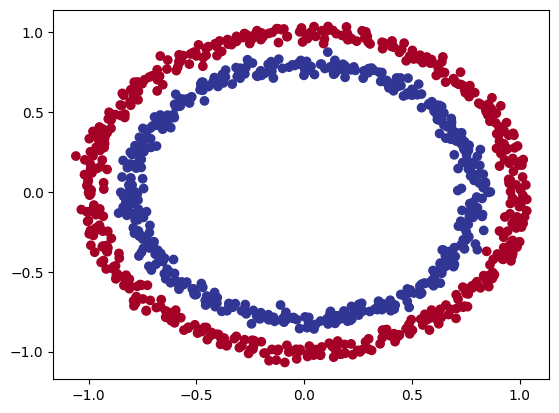

In [134]:
import matplotlib.pyplot as plt 
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Check Input and Output Shapes

In [135]:
X.shape,y.shape

((1000, 2), (1000,))

In [136]:
#View the first example of feature and labels
X_sample=X[0]
y_sample=y[0]
print(f"Values for one sample of X:{X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X:(2,) and the same for y:()


In [137]:
## Turn data into tensors
torch.__version__


'2.1.2+cu118'

In [138]:
X=torch.from_numpy(X).type(torch.float)


In [139]:
y=torch.from_numpy(y).type(torch.float)

In [140]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [141]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [143]:
len(X_train),len(X_test)

(800, 200)

In [144]:
len(y_train),len(y_test)

(800, 200)

In [145]:
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"

In [146]:
device

'cuda'

In [147]:
#1. Construct a model that subclass 
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #Create 2 nn.Linear which are capable of handling the shapes of the data
        self.layer_1=nn.Linear(in_features=2,out_features=5)
        self.layer_2=nn.Linear(in_features=5,out_features=1)

    def forward(self,x):
        return self.layer_2(self.layer_1(x))#  x->layer_1->layer_2->output

model_0=CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [148]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], device='cuda:0', requires_grad=True)

In [149]:
## Replicating using nn.Sequential
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [150]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [151]:
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print("Length of the predictions: {len(untrained_preds)},Shape:{untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)},Shape:{y_test.shape}")
print(f"First 10 predictions:\n{untrained_preds[:10]}")
print(f"Firest 10 labels:\n{y_test[:10]}")


Length of the predictions: {len(untrained_preds)},Shape:{untrained_preds.shape}
Lenght of test samples: 200,Shape:torch.Size([200])
First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')
Firest 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [152]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Selecting the Loss Function and the Optimizer


In [153]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [154]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [155]:
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc
    
    


### Training the Model 

In [156]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [157]:
model_0.eval()
with torch.inference_mode():
 y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [158]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [159]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [160]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [161]:
device

'cuda'

In [162]:
torch.manual_seed(42)

In [163]:
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

#### Building Train and the test loop

In [164]:
epochs=1000

for epoch in range(epochs):
    model_0.train()
    y_logits=model_0(X_train).squeeze()
    y_pred=torch.sigmoid(y_logits).squeeze()
    y_pred_labels=torch.round(y_pred).squeeze()
    loss=loss_fn(y_logits,y_train)
    accuracy=accuracy_fn(y_true=y_train,y_pred=y_pred_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # For Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits=model_0(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    if epoch%10==0:
        print(f"Epoch:{epoch} | Loss:{loss:.5f}, |Accuracy:{accuracy:.5f},| Test_Acc:{test_acc:.2f} | Test loss:{test_loss:.5f}")
        




Epoch:0 | Loss:0.69796, |Accuracy:51.87500,| Test_Acc:58.00 | Test loss:0.69440
Epoch:10 | Loss:0.69590, |Accuracy:51.25000,| Test_Acc:53.00 | Test loss:0.69305
Epoch:20 | Loss:0.69490, |Accuracy:51.62500,| Test_Acc:49.50 | Test loss:0.69254
Epoch:30 | Loss:0.69435, |Accuracy:51.12500,| Test_Acc:49.50 | Test loss:0.69236
Epoch:40 | Loss:0.69401, |Accuracy:50.87500,| Test_Acc:51.00 | Test loss:0.69232
Epoch:50 | Loss:0.69378, |Accuracy:50.25000,| Test_Acc:50.00 | Test loss:0.69234
Epoch:60 | Loss:0.69362, |Accuracy:50.00000,| Test_Acc:51.50 | Test loss:0.69239
Epoch:70 | Loss:0.69351, |Accuracy:50.25000,| Test_Acc:51.00 | Test loss:0.69246
Epoch:80 | Loss:0.69342, |Accuracy:49.87500,| Test_Acc:50.00 | Test loss:0.69254
Epoch:90 | Loss:0.69336, |Accuracy:49.87500,| Test_Acc:53.00 | Test loss:0.69262
Epoch:100 | Loss:0.69331, |Accuracy:49.25000,| Test_Acc:53.00 | Test loss:0.69271
Epoch:110 | Loss:0.69327, |Accuracy:49.75000,| Test_Acc:54.00 | Test loss:0.69279
Epoch:120 | Loss:0.69324, |

Epoch:450 | Loss:0.69300, |Accuracy:50.87500,| Test_Acc:47.00 | Test loss:0.69414
Epoch:460 | Loss:0.69300, |Accuracy:51.00000,| Test_Acc:47.00 | Test loss:0.69416
Epoch:470 | Loss:0.69300, |Accuracy:51.00000,| Test_Acc:47.00 | Test loss:0.69418
Epoch:480 | Loss:0.69300, |Accuracy:51.00000,| Test_Acc:47.00 | Test loss:0.69419
Epoch:490 | Loss:0.69299, |Accuracy:51.12500,| Test_Acc:47.00 | Test loss:0.69421
Epoch:500 | Loss:0.69299, |Accuracy:50.87500,| Test_Acc:47.00 | Test loss:0.69423
Epoch:510 | Loss:0.69299, |Accuracy:51.00000,| Test_Acc:47.00 | Test loss:0.69424
Epoch:520 | Loss:0.69299, |Accuracy:51.12500,| Test_Acc:47.00 | Test loss:0.69426
Epoch:530 | Loss:0.69299, |Accuracy:51.25000,| Test_Acc:46.50 | Test loss:0.69427
Epoch:540 | Loss:0.69299, |Accuracy:51.12500,| Test_Acc:46.50 | Test loss:0.69429
Epoch:550 | Loss:0.69299, |Accuracy:50.87500,| Test_Acc:46.50 | Test loss:0.69430
Epoch:560 | Loss:0.69299, |Accuracy:50.87500,| Test_Acc:46.50 | Test loss:0.69432
Epoch:570 | Loss

### Make Predictions and evaluate the model

In [165]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:  
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


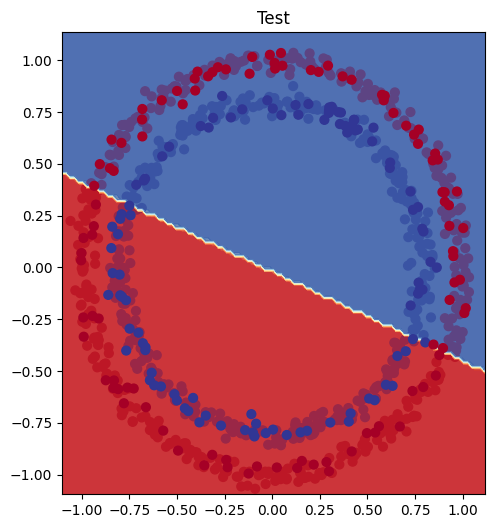

In [166]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)


### Improving a Model

In [167]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=2)

    def forward(self,x):
        z=self.layer_1(x)
        z=self.layer_2(z)
        z=self.layer_3(z)
        return z
        

In [168]:
model_1=CircleModelV1().to(device)

In [169]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=2, bias=True)
)

In [170]:
# Create a Loss Function
loss_fn=nn.BCEWithLogitsLoss()
# Create an Optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)



In [171]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [172]:
len(y_train),len(y_logits),len(y_test),len(X_train),len(X_test)

(800, 800, 200, 800, 200)

In [173]:

# epochs=1000
# X_train,y_train=X_train.to(device),y_train.to(device)
# X_test,y_test=X_test.to(device),y_train.to(device)

# for epoch in range(epochs):
#     model_1.train()
#     y_logits=model_1(X_train)
#     y_pred=torch.round(torch.sigmoid(y_logits))
#     loss=loss_fn(y_logits,y_train)
#     acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     model_1.eval()
#     with torch.inference_mode():
#         test_logits=model_1(X_test).squeeze()
#         test_pred=torch.round(torch.sigmoid(test_logits))
#         test_loss=loss_fn(test_logits,y_test)
#         test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    
#     if(epoch%10==0):
#         print(f"loss:{loss:.2f} | Accuracy:{acc:.5f} | Test_loss:{test_loss:.5f} | Test_Accuracy:{test_acc:.5f}")
    


In [174]:
# torch.manual_seed(42)

# epochs = 1000 # Train for longer

# # Put data to target device
# X_train, y_train = X_train.to(device), y_train.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)

# for epoch in range(epochs):
#     ### Training
#     # 1. Forward pass
#     y_logits = model_1(X_train).squeeze()
#     y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

#     # 2. Calculate loss/accuracy
#     loss = loss_fn(y_pred, y_train)
#     acc = accuracy_fn(y_true=y_train, 
#                       y_pred=y_pred)

#     # 3. Optimizer zero grad
#     optimizer.zero_grad()

#     # 4. Loss backwards
#     loss.backward()

#     # 5. Optimizer step
#     optimizer.step()

#     ### Testing
#     model_1.eval()
#     with torch.inference_mode():
#         # 1. Forward pass
#         test_logits = model_1(X_test).squeeze() 
#         test_pred = torch.round(torch.sigmoid(test_logits))
#         # 2. Caculate loss/accuracy
#         test_loss = loss_fn(test_logits,
#                             y_test)
#         test_acc = accuracy_fn(y_true=y_test,
#                                y_pred=test_pred)

#     # Print out what's happening every 10 epochs
#     if epoch % 100 == 0:
#                 print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


### Preparing data to see if our model can fit a straight line

In [175]:
# Create some data (same as not)
weight=0.7
bias=0.3
start=0
end=1
step=0.01

# Create data 
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias # Linear regression formuale (withouot epsilon)
print(len(X_regression))
X_regression[:5],y_regression[:5]



100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [176]:
train_split=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]
len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)


(80, 20, 80, 20)

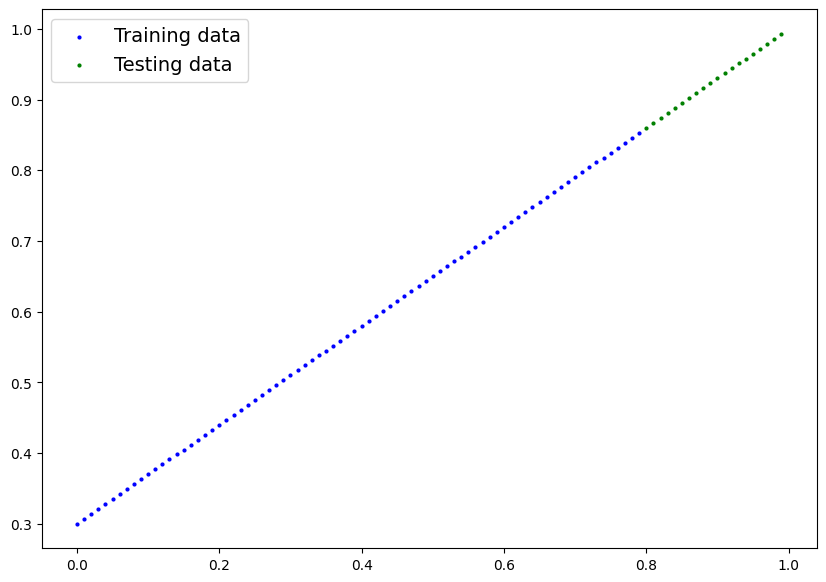

In [177]:
plot_predictions(train_data=X_train_regression,train_labels=y_train_regression,test_data=X_test_regression,test_labels=y_test_regression)

In [178]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=2, bias=True)
)

In [179]:
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [180]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)


In [181]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [182]:
epochs=1000
X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)


In [183]:
# Training
for epoch in range(epochs):
    y_pred=model_2(X_train_regression)
    loss=loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Testing 
    model_2.eval()
    with torch.inference_mode():
      test_pred=model_2(X_test_regression)
      test_loss=loss_fn(test_pred,y_test_regression)

      # Print out What's happening
      if epoch%100==0:
         print(f"Epoch:{epoch} | Loss:{loss:.5f} | Test Loss:{test_loss}")



Epoch:0 | Loss:0.75986 | Test Loss:0.9110288619995117
Epoch:100 | Loss:0.02858 | Test Loss:0.0008127093315124512


Epoch:200 | Loss:0.02533 | Test Loss:0.00209200382232666
Epoch:300 | Loss:0.02137 | Test Loss:0.003050935221835971
Epoch:400 | Loss:0.01964 | Test Loss:0.0034076273441314697
Epoch:500 | Loss:0.01940 | Test Loss:0.003872442292049527
Epoch:600 | Loss:0.01903 | Test Loss:0.0037889957893639803
Epoch:700 | Loss:0.01878 | Test Loss:0.003813284682109952
Epoch:800 | Loss:0.01840 | Test Loss:0.0032871782314032316
Epoch:900 | Loss:0.01798 | Test Loss:0.0036036730743944645


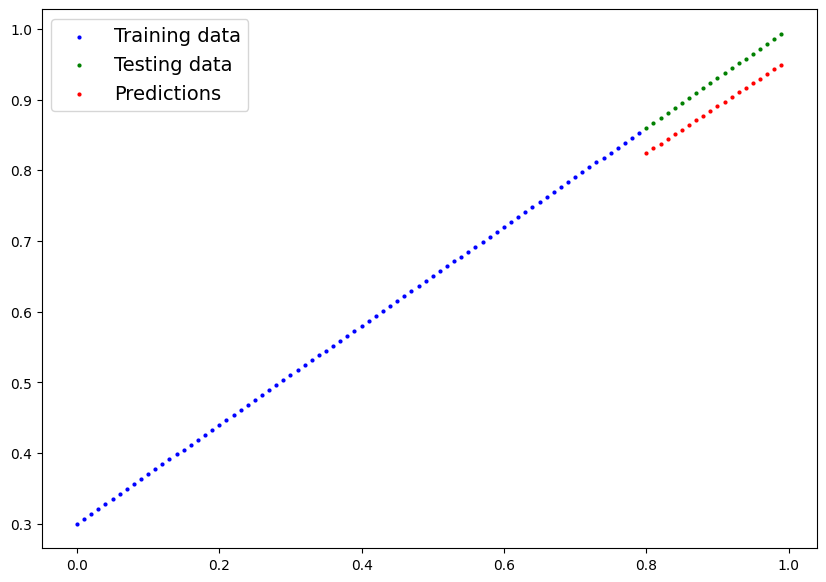

In [184]:
# Turn on evaluation mode
model_2.eval()

with torch.inference_mode():
    y_preds=model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),train_labels=y_train_regression.cpu(),test_data=X_test_regression.cpu(),test_labels=y_test_regression.cpu(),predictions=y_preds.cpu())


## Non Linearity

#### Recreating non -Linear Data(red and blue circles)

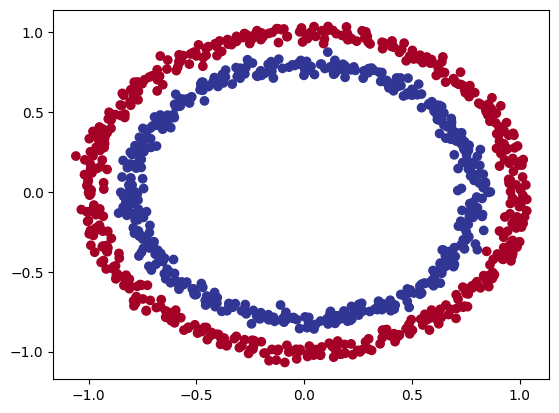

In [185]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [186]:
# Convert data to tensors and them to train and test splits.
import torch
from sklearn.model_selection import train_test_split 
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [187]:
X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building a Model with Non Linearity


In [188]:
from torch import nn
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        self.relu=nn.ReLU() #relu is non-linear activation function.
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3=CircleModelV3().to(device)
model_3


CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [189]:
## Setup loss and optimizer
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_3.parameters(),lr=0.1)


In [190]:
# Traiining the model with non-Linearity
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on the target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

epochs=1000

for epoch in range(epochs):
    model_3.train()

    # 1.Forward pass
    y_logits=model_3(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))# logits->preiction probability ->prediction labels

    # 2.Calaculate the Loss function.
    loss=loss_fn(y_logits,y_train)  
    

   # 3.Optimize 
    optimizer.zero_grad()

    # 4.Loss Backward
    loss.backward()

    # 5.Step the optimizer
    optimizer.step()

    # Testing 
    model_3.eval()
    with torch.inference_mode():
      test_logits=model_3(X_test).squeeze()
      test_pred=torch.round(torch.sigmoid(test_logits))
      test_loss=loss_fn(test_logits,y_test)
      test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
      

      # Print out What's happening
      if epoch%100==0:
         print(f"Epoch:{epoch} | Loss:{loss:.5f} | Test Loss:{test_loss} | Acc:{test_acc:.2f}")







Epoch:0 | Loss:0.69295 | Test Loss:0.6931881308555603 | Acc:50.00
Epoch:100 | Loss:0.69115 | Test Loss:0.6910240054130554 | Acc:52.50
Epoch:200 | Loss:0.68977 | Test Loss:0.6893961429595947 | Acc:55.00
Epoch:300 | Loss:0.68795 | Test Loss:0.687231719493866 | Acc:56.00
Epoch:400 | Loss:0.68517 | Test Loss:0.6841148138046265 | Acc:56.50
Epoch:500 | Loss:0.68102 | Test Loss:0.6794120073318481 | Acc:56.50
Epoch:600 | Loss:0.67515 | Test Loss:0.6728507876396179 | Acc:56.00
Epoch:700 | Loss:0.66659 | Test Loss:0.6632164716720581 | Acc:59.00
Epoch:800 | Loss:0.65160 | Test Loss:0.647568941116333 | Acc:67.50
Epoch:900 | Loss:0.62362 | Test Loss:0.6214525699615479 | Acc:79.00


In [191]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01

### 6.4 Evaluatiing a mmodel trained with Non-Linear Activation Functions

In [192]:
model_3.eval()
with torch.inference_mode():
    y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

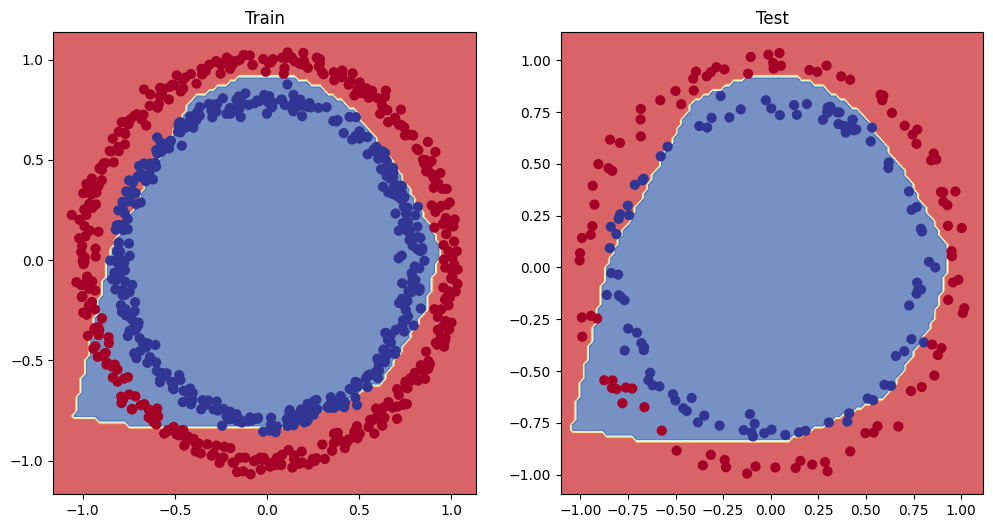

In [193]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)


### 7. Replicating the non-linear activation functions


In [194]:
A=torch.arange(-10,10,1,dtype=torch.float32)
A.dtype


torch.float32

In [195]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

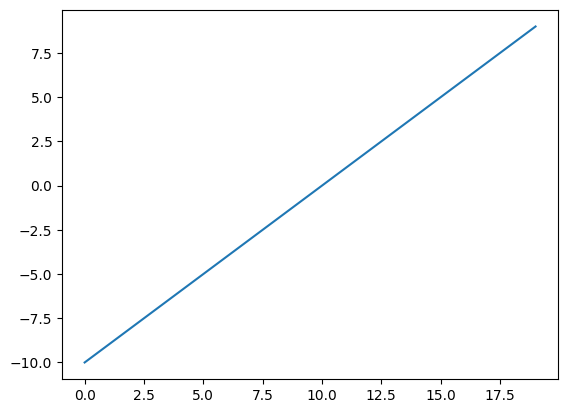

In [196]:
plt.plot(A)

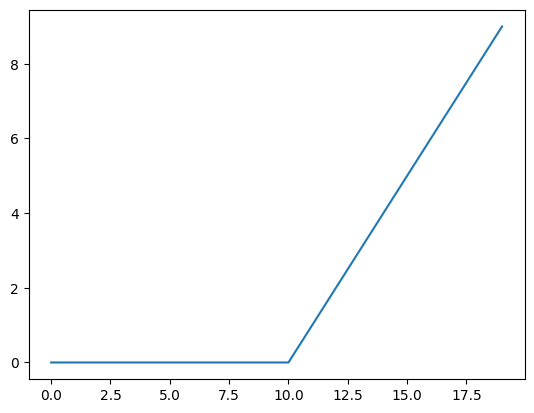

In [197]:
plt.plot(torch.relu(A))

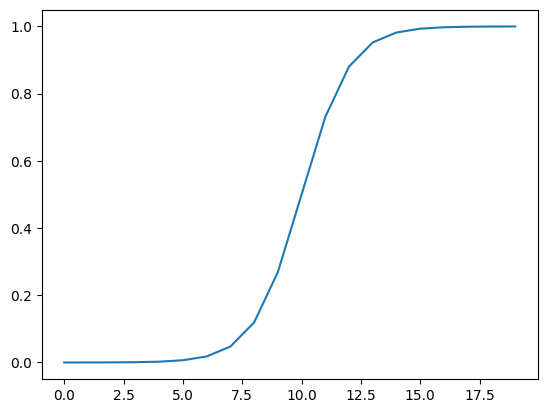

In [198]:
plt.plot(torch.sigmoid(A))

### Putting all together with a multiclassification problem

### Creating a toy multiclass dataset

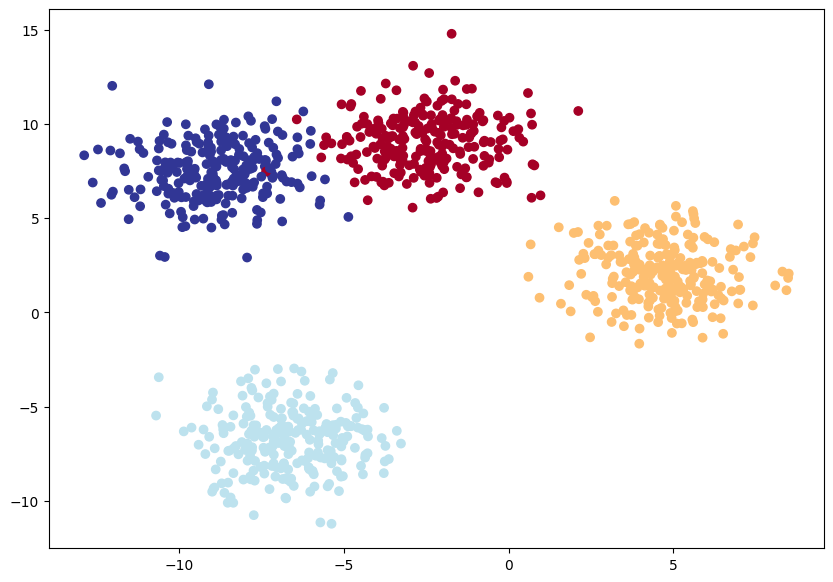

In [227]:
import torch
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Setting the Hyperparameters
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42
X_blob,y_blob=make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers=NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_SEED)
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into train and test
X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,y_blob,test_size=0.20,random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [255]:
### Buildiing a Multiclass Classification Model
class BlobModel(nn.Module):
    def __init__(self,in_features,out_features,hidden_units=8):
        super().__init__()
        self.linear_layer_stack=nn.Sequential(
            nn.Linear(in_features=in_features,out_features=hidden_units),
           # nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
           # nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=out_features)
            
        )

    def forward(self,x):
        return self.linear_layer_stack(x)
        

model_4=BlobModel(in_features=2,out_features=4,hidden_units=8).to(device)


In [256]:
X_blob_train.shape,y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [257]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

#### Create a loss function and optimizer for multiclass classification model.

In [258]:
loss_fn=nn.CrossEntropyLoss() 

# Create an optimizer for multiclass classification model
optimizer=torch.optim.SGD(params=model_4.parameters(),lr=0.1)

#### Getting Prediction Probabilites for Multiclass classification model

In [259]:
X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

In [260]:
model_4.eval()
with torch.inference_mode():
    y_preds=model_4(X_blob_test.to(device))

y_preds[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [261]:
y_pred_prob=torch.softmax(y_preds,dim=1)
print(y_preds[:5])
print(y_pred_prob[:5])


tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [262]:
# Convert our model's prediction proboabilities to prediction label
y_preds=torch.argmax(y_pred_prob,dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [263]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [264]:
## Training and testing Loop for the Multiclass Classification Model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [265]:
torch.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f},Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861,Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037,Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216,Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133,Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098,Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486,Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083,Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799,Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587,Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423,Test Loss: 0.02423, Test Acc: 99.50%
Epoch: 100 | Loss: 0.03185, Acc

Epoch: 160 | Loss: 0.02819, Acc: 99.12% | Test Loss: 0.01852,Test Loss: 0.01852, Test Acc: 99.50%
Epoch: 170 | Loss: 0.02785, Acc: 99.12% | Test Loss: 0.01809,Test Loss: 0.01809, Test Acc: 99.50%
Epoch: 180 | Loss: 0.02756, Acc: 99.12% | Test Loss: 0.01770,Test Loss: 0.01770, Test Acc: 99.50%
Epoch: 190 | Loss: 0.02730, Acc: 99.12% | Test Loss: 0.01735,Test Loss: 0.01735, Test Acc: 99.50%
Epoch: 200 | Loss: 0.02707, Acc: 99.12% | Test Loss: 0.01704,Test Loss: 0.01704, Test Acc: 99.50%
Epoch: 210 | Loss: 0.02686, Acc: 99.12% | Test Loss: 0.01675,Test Loss: 0.01675, Test Acc: 99.50%
Epoch: 220 | Loss: 0.02667, Acc: 99.12% | Test Loss: 0.01649,Test Loss: 0.01649, Test Acc: 99.50%
Epoch: 230 | Loss: 0.02650, Acc: 99.12% | Test Loss: 0.01625,Test Loss: 0.01625, Test Acc: 99.50%
Epoch: 240 | Loss: 0.02635, Acc: 99.25% | Test Loss: 0.01603,Test Loss: 0.01603, Test Acc: 99.50%
Epoch: 250 | Loss: 0.02621, Acc: 99.25% | Test Loss: 0.01582,Test Loss: 0.01582, Test Acc: 99.50%
Epoch: 260 | Loss: 0

In [266]:
model_4.eval()
with torch.inference_mode():
    y_logits=model_4(X_blob_test)
y_logits

tensor([[  6.1117,  18.9106, -22.9632, -14.6995],
        [  9.5662, -23.8503,   5.8412,  17.7025],
        [ -8.4025, -21.8530,  30.5466,  17.0857],
        [  2.1340,  14.6655, -13.7829, -11.2652],
        [ 13.2141,   3.9343, -21.4953,  -3.6479],
        [ 10.8391, -29.6208,   8.5481,  22.0345],
        [ -9.3843, -15.7081,  27.1174,  12.4538],
        [ 11.9275,  -3.3287, -13.8623,   1.9499],
        [ -7.8685, -31.8187,  37.6564,  24.6508],
        [ 12.1832,  -0.6223, -16.3792,  -0.1247],
        [ 11.1011,  -7.0512,  -9.7058,   4.8274],
        [  6.3786,  22.3877, -26.1069, -17.3619],
        [ 13.2856,   1.7797, -19.8939,  -2.0101],
        [ 13.6743,  -2.3971, -17.1554,   1.1522],
        [ 14.6769,  -1.2101, -19.5619,   0.1975],
        [  9.5948, -19.5587,   2.4012,  14.4317],
        [  9.5808, -24.9934,   6.7249,  18.5726],
        [ -3.2269, -17.8217,  19.7831,  13.7540],
        [ 11.9517, -25.2460,   3.4565,  18.6457],
        [  7.4809, -26.7689,  11.2028,  20.0309],


In [267]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs

tensor([[2.7638e-06, 1.0000e+00, 6.5229e-19, 2.5312e-15],
        [2.9263e-04, 8.9892e-19, 7.0562e-06, 9.9970e-01],
        [1.2151e-17, 1.7504e-23, 1.0000e+00, 1.4255e-06],
        [3.6113e-06, 1.0000e+00, 4.4163e-13, 5.4759e-12],
        [9.9991e-01, 9.3284e-05, 8.4313e-16, 4.7522e-08],
        [1.3737e-05, 3.6845e-23, 1.3897e-06, 9.9998e-01],
        [1.4044e-16, 2.5184e-19, 1.0000e+00, 4.2822e-07],
        [9.9995e-01, 2.3677e-07, 6.3043e-12, 4.6427e-05],
        [1.6934e-20, 6.7194e-31, 1.0000e+00, 2.2478e-06],
        [9.9999e-01, 2.7456e-06, 3.9401e-13, 4.5159e-06],
        [9.9812e-01, 1.3055e-08, 9.1809e-10, 1.8817e-03],
        [1.1151e-07, 1.0000e+00, 8.6902e-22, 5.4570e-18],
        [9.9999e-01, 1.0070e-05, 3.8934e-15, 2.2759e-07],
        [1.0000e+00, 1.0478e-07, 4.0815e-14, 3.6453e-06],
        [1.0000e+00, 1.2600e-07, 1.3498e-15, 5.1486e-07],
        [7.8696e-03, 1.7169e-15, 5.9132e-06, 9.9212e-01],
        [1.2441e-04, 1.2007e-19, 7.1541e-06, 9.9987e-01],
        [1.013

In [268]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [269]:
y_preds=torch.argmax(y_pred_probs,dim=1)

In [270]:
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

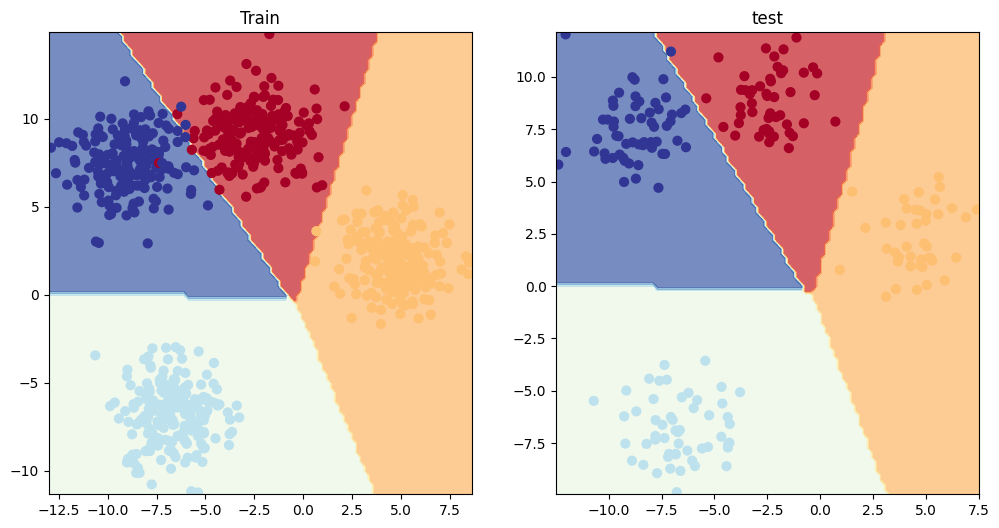

In [271]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

### Classification Metrics


1.Classification

2.Recall

3.Precision

4.F1Score

5.Classification Report

6.Confusion Matrix

In [274]:
import torchmetrics
from torchmetrics import Accuracy
torchmetric_accuracy=Accuracy().to(device)
torchmetric_accuracy(y_preds,y_blob_test)

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'